In [149]:
### Original dataset: https://www.kaggle.com/jeet2016/us-financial-news-articles

from os import getcwd, path, listdir
cwd = os.getcwd()
data_news_dir = path.join(cwd, '../data/news')
dirs_to_process = [
    path.realpath(path.join(data_news_dir, entry))
    for entry in listdir(data_news_dir)
    if entry.startswith('2018') and path.isdir(path.join(data_news_dir, entry))
]
dirs_to_process


['/Users/melkos01/Documents/aitalents-investoid/data/news/2018_03_112b52537b67659ad3609a234388c50a',
 '/Users/melkos01/Documents/aitalents-investoid/data/news/2018_04_112b52537b67659ad3609a234388c50a',
 '/Users/melkos01/Documents/aitalents-investoid/data/news/2018_02_112b52537b67659ad3609a234388c50a',
 '/Users/melkos01/Documents/aitalents-investoid/data/news/2018_01_112b52537b67659ad3609a234388c50a',
 '/Users/melkos01/Documents/aitalents-investoid/data/news/2018_05_112b52537b67659ad3609a234388c50a']

In [150]:
from json import loads, dumps
def flatten_dict(dd, separator ='.', prefix =''): 
    return { prefix + separator + k if prefix else k : v 
             for kk, vv in dd.items() 
             for k, v in flatten_dict(vv, separator, kk).items() 
             } if isinstance(dd, dict) else { prefix : dd } 
def pick_keys(dict_, *args):
    return {k:dict_[k] for k in args if k in dict_}
def preprocess_file(fp):
    with open(fp) as f:
        contents = loads(f.read())
        return pick_keys(
            flatten_dict(contents),
            'thread.social.pinterest.shares',
            'thread.social.vk.shares',
            'thread.social.linkedin.shares',
            'thread.social.facebook.likes',
            'thread.social.facebook.shares',
            'thread.social.facebook.comments',
            'thread.social.stumbledupon.shares',
            'thread.site_full',
            'thread.domain_rank',
            'thread.performance_score',
            'thread.participants_count',
            'thread.spam_score',
            'thread.site_type',
            'thread.replies_count',
            'title',
            'entities.organizations',
            'language',
            'text',
            'published'
        )
sample_dir = dirs_to_process[0]
sample_file = path.join(sample_dir,listdir(sample_dir)[0])
preprocess_file(sample_file)

{'thread.social.pinterest.shares': 0,
 'thread.social.vk.shares': 0,
 'thread.social.linkedin.shares': 0,
 'thread.social.facebook.likes': 0,
 'thread.social.facebook.shares': 0,
 'thread.social.facebook.comments': 0,
 'thread.social.stumbledupon.shares': 0,
 'thread.site_full': 'www.reuters.com',
 'thread.domain_rank': 408,
 'thread.performance_score': 0,
 'thread.participants_count': 1,
 'thread.spam_score': 0.005,
 'thread.site_type': 'news',
 'thread.replies_count': 0,
 'title': 'BRIEF-AU Optronics to pay cash dividend of T$1.2/share for 2017',
 'entities.organizations': [{'name': 'au optronics corp',
   'sentiment': 'negative'},
  {'name': 'reuters', 'sentiment': 'negative'},
  {'name': 'brief-au optronics', 'sentiment': 'negative'},
  {'name': 'beijing headline news', 'sentiment': 'none'}],
 'language': 'english',
 'text': 'March 27(Reuters) - AU Optronics Corp :\n* Says it plans to pay cash dividend of T$1.2/share for 2017\nSource text in Chinese: goo.gl/uxuxci\nFurther company 

In [151]:
def preprocess_dir(dp):
    year,month = path.basename(dp).split('_')[:2]
    out_file = path.join(dp,f'../{year}-{month}.json')
    contents = list(map(lambda fp: preprocess_file(path.join(dp, fp)),listdir(dp)))
    with open(out_file, 'w') as f:
        f.write(dumps(contents))
preprocess_dir(dirs_to_process[0])

In [152]:
import pandas as pd

def get_df_path(year, month):
    return path.join(data_news_dir, f'{year}-{month}.json')
df = pd.read_json(get_df_path(2018,'03'))
df.head()

,thread.social.pinterest.shares,thread.social.vk.shares,thread.social.linkedin.shares,thread.social.facebook.likes,thread.social.facebook.shares,thread.social.facebook.comments,thread.social.stumbledupon.shares,thread.site_full,thread.domain_rank,thread.performance_score,thread.participants_count,thread.spam_score,thread.site_type,thread.replies_count,title,entities.organizations,language,text,published
0,0,0,0,0,0,0,0,www.reuters.com,408.0,0,1,0.005,news,0,BRIEF-AU Optronics to pay cash dividend of T$1...,"[{'name': 'au optronics corp', 'sentiment': 'n...",english,March 27(Reuters) - AU Optronics Corp :\n* Say...,2018-03-27T22:14:00.000+03:00
1,0,0,0,4,4,0,0,uk.reuters.com,408.0,0,0,0.000,news,0,British stats watchdog - stop using RPI inflat...,"[{'name': 'reuters staff', 'sentiment': 'none'...",english,"March 8, 2018 / 1:35 PM / Updated an hour ago ...",2018-03-08T15:42:00.000+02:00
2,0,0,0,0,0,0,0,in.reuters.com,408.0,0,0,0.000,news,0,Dropbox shares surge in IPO,"[{'name': 'ipo dropbox', 'sentiment': 'negativ...",english,"Dropbox shares surge in IPO Saturday, March 24...",2018-03-23T22:23:00.000+03:00
3,0,0,0,0,0,0,0,www.reuters.com,408.0,0,1,0.064,news,0,Bookkeeper of Auschwitz dies before starting s...,"[{'name': 'reuters', 'sentiment': 'negative'},...",english,BERLIN (Reuters) - The man known as the “bookk...,2018-03-13T01:05:00.000+02:00
4,0,0,0,0,0,0,0,www.cnbc.com,767.0,0,1,0.000,news,0,US stocks set for a negative open as trade war...,"[{'name': 's&p', 'sentiment': 'none'}]",english,Dow closes 336 points higher as trade-war worr...,2018-03-05T13:27:00.000+02:00


In [156]:
df.describe()

,thread.social.pinterest.shares,thread.social.vk.shares,thread.social.linkedin.shares,thread.social.facebook.likes,thread.social.facebook.shares,thread.social.facebook.comments,thread.social.stumbledupon.shares,thread.domain_rank,thread.performance_score,thread.participants_count,thread.spam_score,thread.replies_count
count,57456.000000,57456.000000,57456.0,57456.000000,57456.000000,57456.000000,57456.000000,57381.000000,57456.000000,57456.000000,57456.000000,57456.0
mean,0.012079,0.000365,0.0,11.908312,11.908417,0.000087,0.000139,525.548823,0.065842,0.543599,0.099462,0.0
std,0.180776,0.023225,0.0,144.315498,144.315491,0.009328,0.025717,189.195368,0.647521,0.498100,0.249930,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,387.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,408.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,408.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,767.000000,0.000000,1.000000,0.010000,0.0
max,13.000000,3.000000,0.0,9847.000000,9847.000000,1.000000,6.000000,1196.000000,10.000000,1.000000,1.000000,0.0


<AxesSubplot:xlabel='thread.social.facebook.shares', ylabel='thread.performance_score'>

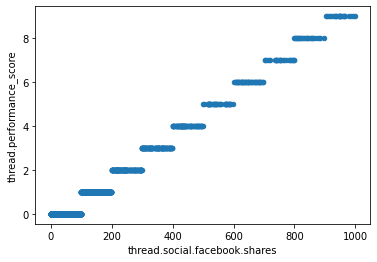

In [163]:
df['thread.social.facebook.shares'].corr(df['thread.performance_score'])
threshold = 1000
compared_records = df[df['thread.social.facebook.shares'] <= threshold]
compared_records.plot.scatter('thread.social.facebook.shares', 'thread.performance_score')
# thread performance was just measured using facebook shares :D


In [164]:
df = df.drop(columns=['thread.social.pinterest.shares','thread.social.vk.shares','thread.social.linkedin.shares','thread.social.facebook.comments'])

In [165]:
df = df.drop(columns=['thread.social.facebook.likes'])

In [166]:
df = df.drop(columns=['thread.social.stumbledupon.shares'])

In [167]:
df['thread.site_full'] = df['thread.site_full'].astype('category')

In [168]:
good_thread_performance = df[df['thread.performance_score'] == 10]
good_thread_performance[['title','text']].to_json(path.join(data_news_dir, 'good_thread_performance.json'))
# Good thread performance is just an indicator of possible tabloid artice

In [169]:
df['thread.domain_rank'].value_counts()
# Simple labeling
# 408: reuters
# 767: cnbc
# 387: wsj
# 1196: fortune

408.0     36224
767.0     16420
387.0      3563
1196.0     1174
Name: thread.domain_rank, dtype: int64

In [170]:
df['thread.site_full'].value_counts()

www.reuters.com     26543
www.cnbc.com        16420
uk.reuters.com       5816
in.reuters.com       3790
www.wsj.com          3478
fortune.com          1174
live.wsj.com           75
jp.wsj.com             74
it.reuters.com         74
graphics.wsj.com        9
quotes.wsj.com          1
cn.reuters.com          1
chinese.wsj.com         1
Name: thread.site_full, dtype: int64

In [171]:
df[(df['thread.domain_rank'] == 767) & (df['thread.site_full'] != 'www.cnbc.com')]

,thread.social.facebook.shares,thread.site_full,thread.domain_rank,thread.performance_score,thread.participants_count,thread.spam_score,thread.site_type,thread.replies_count,title,entities.organizations,language,text,published


In [172]:
df[(df['thread.domain_rank'] == 408) & (~df['thread.site_full'].str.contains('reuters'))]

,thread.social.facebook.shares,thread.site_full,thread.domain_rank,thread.performance_score,thread.participants_count,thread.spam_score,thread.site_type,thread.replies_count,title,entities.organizations,language,text,published


In [173]:
df[(df['thread.domain_rank'] == 1196) & (df['thread.site_full'] != 'fortune.com')]

,thread.social.facebook.shares,thread.site_full,thread.domain_rank,thread.performance_score,thread.participants_count,thread.spam_score,thread.site_type,thread.replies_count,title,entities.organizations,language,text,published


In [174]:
df = df.drop(columns=['thread.domain_rank','thread.performance_score'])

In [175]:
spam = df[df['thread.spam_score'] > 0.8]
spam[['title','text']].to_json(path.join(data_news_dir, 'spam_articles.json'))

In [176]:
srs_spam = spam[spam['thread.spam_score'] == 1]
srs_spam[['title','text']].to_json(path.join(data_news_dir, 'srs_spam_articles.json'))
# Examined records with high spam_score value, not significant indicator
# just classified that when sent to an email could be a spam

In [177]:
df = df.drop(columns='thread.spam_score')

In [178]:
df = df.drop(columns=['thread.replies_count'])

In [185]:
df = df.drop(columns=['thread.social.facebook.shares'])
# Removed because just correlation with useless features (which was just tabloid detection)

KeyError: "['thread.social.facebook.shares'] not found in axis"

In [187]:
df = df.drop(columns=['thread.participants_count'])
# TBH don't know semantics of this feature

KeyError: "['thread.participants_count'] not found in axis"

In [190]:
df['thread.site_type'].value_counts()

news     55410
blogs     2046
Name: thread.site_type, dtype: int64

In [195]:
blogs_only = df[df['thread.site_type'] == 'blogs'].sample(5)
blogs_only[['title','text']].to_json(path.join(data_news_dir, 'blogs_sample.json'))
# Blogs should be fine, no major difference found between blogs and articles
df = df.drop(columns=['thread.site_type'])

In [197]:
df['language'].value_counts()

english    57456
Name: language, dtype: int64

In [198]:
df = df.drop(columns=['language'])

In [204]:
prepared_dir = path.join(cwd, '../data/prepared')
cols_to_keep = ['thread.site_full', 'title', 'entities.organizations', 'text', 'published']
for dp in dirs_to_process:
    print(f'Directory {dp}')
    year,month = dp.split('/')[-1].split('_')[:2]
    preprocess_dir(dp)
    df = pd.read_json(get_df_path(year,month))
    df = df[cols_to_keep]
    df.to_json(path.join(prepared_dir, f'{year}-{month}.json'))

Directory /Users/melkos01/Documents/aitalents-investoid/data/news/2018_03_112b52537b67659ad3609a234388c50a
Directory /Users/melkos01/Documents/aitalents-investoid/data/news/2018_04_112b52537b67659ad3609a234388c50a
Directory /Users/melkos01/Documents/aitalents-investoid/data/news/2018_02_112b52537b67659ad3609a234388c50a
Directory /Users/melkos01/Documents/aitalents-investoid/data/news/2018_01_112b52537b67659ad3609a234388c50a
Directory /Users/melkos01/Documents/aitalents-investoid/data/news/2018_05_112b52537b67659ad3609a234388c50a
